# Первое задание

Для решения задач в рамках первого и третьего заданий билета необходимо применить методы математического
программирования, реализованные на Python во время выполнения лабораторных работ по модулю, или другом
выбранном языке программирования, но без использования специальных библиотек;

---

Симплекс-метод позволяет эффективно найти оптимальное решение, избегая простой перебор всех возможных угловых точек. Основной принцип метода: вычисления начинаются с какого-то «стартового» базисного решения, а затем ведется поиск решений, «улучшающих» значение целевой функции. Это возможно только в том случае, если возрастание какой-то переменной приведет к увеличению значения функционала.



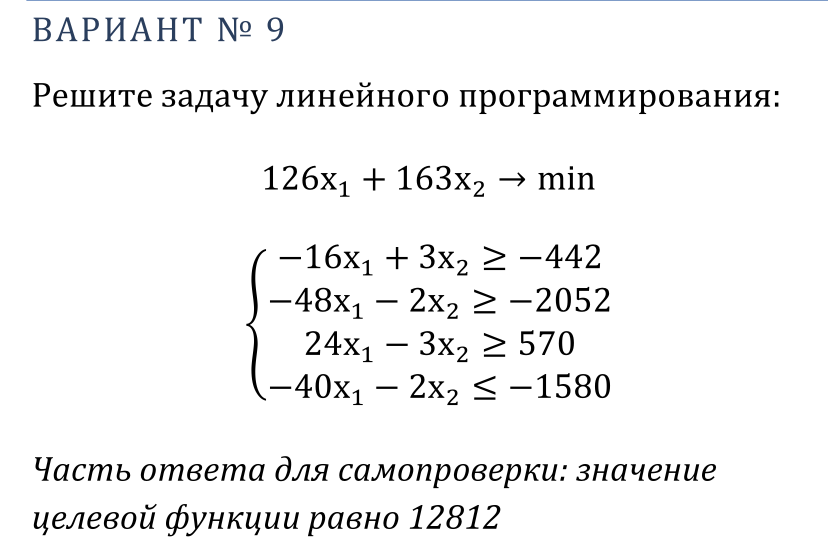

*Шаги симплекс-метода:*

1. *Формирование симплекс-таблицы:* В симплекс-таблице представлены все ограничения и целевая функция.

2. *Поиск опорного столбца:* Опорный столбец — это тот, в котором в строке целевой функции есть самое "плохое" (наибольшее отрицательное) значение. Этот столбец указывает, какую переменную нужно включить в базис (переменные, которые мы изменяем, чтобы улучшить целевую функцию).

3. *Поиск опорной строки:* Опорная строка — это строка, которая указывает, какая переменная выйдет из базиса, чтобы улучшить решение.

4. *Приведение опорного элемента к единице:* Мы нормализуем строку так, чтобы элемент на пересечении опорной строки и столбца стал единицей.

5. *Элементарные преобразования строк:* Мы изменяем все остальные строки так, чтобы в опорном столбце все элементы, кроме опорного элемента, стали равны нулю.

6. *Повторение шагов 2-5:* Мы повторяем эти шаги до тех пор, пока в строке целевой функции не останется отрицательных элементов, что указывает на оптимальное решение.

In [4]:
def print_simplex_table(simplex_table):
  print("Текущая симплекс таблица: ")
  for row in simplex_table:
    print(row)

# Функция для преобразования симплекс таблицы по опорному методу
def pivot_column(simplex_table, row, col):
  # Нормализуем строку чтобы опорный элемент стал 1
  pivot_element = simplex_table[row][col]
  simplex_table[row] = [element / pivot_element for element in simplex_table[row]]
  # Теперь изменяем все остальные строки таким образом, чтобы в этом столбце были нули
  for i in range(len(simplex_table)):
    if i != row:
      row_factor = simplex_table[i][col]
      simplex_table[i] = [simplex_table[i][j] - row_factor * simpelex_table[row][j] for j in range(simplex_table[0])]

# Реализуем функцию симплекс-метода
'''
c - целевая функция
a - коэффициенты ограничений
b - правая часть ограничений
'''
def simplex(c, a, b):
  num_vars = len(c) # кол-во переменных x1, x2
  num_constraints = len(b) # кол-во ограничений
  simplex_table = []

  for i in range(num_constraints):
    # Каждая строка: коэффициенты ограничений, дополнительные переменные и правая часть (b)
    row = a[i] + [0] * num_constraints + [b[i]]  # Добавляем 0 для дополнительных переменных
    row[num_vars + i] = 1  # Единичная матрица для дополнительных переменных
    simplex_table.append(row)
    simplex_table.append([-ci for ci in c] + [0] * (num_constraints + 1))

    print("Начальная таблица: ")
    print_simplex_table(simplex_table)

    while True:
      # Шаг 1: Проверяем на оптимальность
      # Если все элементы в строке целевой функции (кроме последнего) положительны, решение оптимально
      if all(x >= 0 for x in simplex_table[-1][:-1]):
        break
      # Шаг 2: Находим разрешающий столбец (самый отрицательный элемент)
      pivot_col = min(range(len(simplex_table[-1]) - 1), key=lambda j: simplex_table[-1][j])
      # Шаг 3: Проверка на неограниченность
      # Если во всех строках в этом столбце значения меньше или равны 0, решение не существует
      if all(row[pivot_col] <= 0 for row in simplex_table[:-1]):
        raise ValueError("Решение не существует (неограниченная задача)")
      # Шаг 4: Находим разрешающую строку
      ratios = [(simplex_table[i][-1] / simplex_table[i][pivot_col]) if simplex_table[i][pivot_col] > 0 else float('inf') for i in range(len(simplex_table) - 1)]
      pivot_row = min(range(len(ratios)), key=lambda i: ratios[i])
      pivot_column(simplex_table, pivot_row, pivot_col)
      print("\nТаблица после шага:")
      print_simplex_table(simplex_table)

    solution = [0] * num_vars
    for i in range(num_vars):
      col = [simplex_table[j][i] for j in range(num_constraints)]
      if col.count(1) == 1 and col.count(0) == num_constraints - 1:
        solution[i] = simplex_table[col.index(1)][-1]

    return solution, simplex_table[-1][-1]

def main():
  c = [126, 163]
  A = [
      [-16, 3],
      [-48, -2],
      [24, -3],
      [-40, -2]
  ]
  b = [-442, -2052, 570, -1580]
  solution, min_value = simplex(c, A, b)
  print("\nОптимальные значения переменных:", solution)
  print("Значение целевой функции:", min_value)

if __name__ == '__main__':
  main()


Начальная таблица: 
Текущая симплекс таблица: 
[-16, 3, 1, 0, 0, 0, -442]
[-126, -163, 0, 0, 0, 0, 0]


TypeError: 'list' object cannot be interpreted as an integer

In [5]:
# Функция для вывода симплекс-таблицы на экран (чтобы видеть прогресс решения)
def print_tableau(tableau):
    print("Текущая симплекс-таблица:")
    for row in tableau:
        print(row)

# Функция для выполнения преобразований в симплекс-таблице по опорному элементу
def pivot_on(tableau, row, col):
    # Нормализуем строку, чтобы опорный элемент стал равен 1
    pivot_element = tableau[row][col]
    tableau[row] = [element / pivot_element for element in tableau[row]]

    # Теперь все остальные строки изменяем так, чтобы в этом столбце были нули
    for i in range(len(tableau)):
        if i != row:
            row_factor = tableau[i][col]
            tableau[i] = [tableau[i][j] - row_factor * tableau[row][j] for j in range(len(tableau[0]))]

# Главная функция, которая решает задачу симплекс-методом
def simplex(c, A, b):
    num_vars = len(c)  # Количество переменных (x1, x2)
    num_constraints = len(b)  # Количество ограничений

    # Создаем симплекс-таблицу
    tableau = []

    # Добавляем ограничения в симплекс-таблицу
    for i in range(num_constraints):
        # Каждая строка: коэффициенты ограничений, дополнительные переменные и правая часть (b)
        row = A[i] + [0] * num_constraints + [b[i]]  # Добавляем 0 для дополнительных переменных
        row[num_vars + i] = 1  # Единичная матрица для дополнительных переменных
        tableau.append(row)

    # Добавляем строку для целевой функции
    tableau.append([-ci for ci in c] + [0] * (num_constraints + 1))  # Ставим нули для дополнительных переменных и свободного члена

    # Выводим начальную таблицу
    print("Начальная таблица:")
    print_tableau(tableau)

    # Начинаем цикл симплекс-метода
    while True:
        # Шаг 1: Проверяем на оптимальность
        # Если все элементы в строке целевой функции (кроме последнего) положительны, решение оптимально
        if all(x >= 0 for x in tableau[-1][:-1]):
            break  # Выход из цикла — решение найдено

        # Шаг 2: Находим разрешающий столбец (самый отрицательный элемент)
        pivot_col = min(range(len(tableau[-1]) - 1), key=lambda j: tableau[-1][j])

        # Шаг 3: Проверка на неограниченность
        # Если во всех строках в этом столбце значения меньше или равны 0, решение не существует
        if all(row[pivot_col] <= 0 for row in tableau[:-1]):
            raise ValueError("Решение не существует (неограниченная задача)")

        # Шаг 4: Находим разрешающую строку
        ratios = [(tableau[i][-1] / tableau[i][pivot_col]) if tableau[i][pivot_col] > 0 else float('inf') for i in range(len(tableau) - 1)]
        pivot_row = min(range(len(ratios)), key=lambda i: ratios[i])

        # Шаг 5: Выполняем преобразование симплекс-таблицы по опорному элементу
        pivot_on(tableau, pivot_row, pivot_col)

        # Выводим текущую таблицу после преобразования
        print("\nТаблица после шага:")
        print_tableau(tableau)

    # Возвращаем решение (значения переменных)
    solution = [0] * num_vars
    for i in range(num_vars):
        col = [tableau[j][i] for j in range(num_constraints)]
        if col.count(1) == 1 and col.count(0) == num_constraints - 1:
            solution[i] = tableau[col.index(1)][-1]

    # Возвращаем решение и значение целевой функции
    return solution, tableau[-1][-1]

# Целевая функция (стоимости переменных)
c = [126, 163]

# Коэффициенты ограничений
A = [
    [-16, 3],
    [-48, -2],
    [24, -3],
    [-40, -2]
]

# Правая часть ограничений
b = [-442, -2052, 570, -1580]

# Запускаем симплекс-метод
solution, min_value = simplex(c, A, b)

# Вывод решения
print("\nОптимальные значения переменных:", solution)
print("Значение целевой функции:", min_value)


Начальная таблица:
Текущая симплекс-таблица:
[-16, 3, 1, 0, 0, 0, -442]
[-48, -2, 0, 1, 0, 0, -2052]
[24, -3, 0, 0, 1, 0, 570]
[-40, -2, 0, 0, 0, 1, -1580]
[-126, -163, 0, 0, 0, 0, 0]

Таблица после шага:
Текущая симплекс-таблица:
[-5.333333333333333, 1.0, 0.3333333333333333, 0.0, 0.0, 0.0, -147.33333333333334]
[-58.666666666666664, 0.0, 0.6666666666666666, 1.0, 0.0, 0.0, -2346.6666666666665]
[8.0, 0.0, 1.0, 0.0, 1.0, 0.0, 128.0]
[-50.666666666666664, 0.0, 0.6666666666666666, 0.0, 0.0, 1.0, -1874.6666666666667]
[-995.3333333333333, 0.0, 54.33333333333333, 0.0, 0.0, 0.0, -24015.333333333336]

Таблица после шага:
Текущая симплекс-таблица:
[0.0, 1.0, 1.0, 0.0, 0.6666666666666666, 0.0, -62.000000000000014]
[0.0, 0.0, 8.0, 1.0, 7.333333333333333, 0.0, -1408.0]
[1.0, 0.0, 0.125, 0.0, 0.125, 0.0, 16.0]
[0.0, 0.0, 7.0, 0.0, 6.333333333333333, 1.0, -1064.0]
[0.0, 0.0, 178.75, 0.0, 124.41666666666666, 0.0, -8090.000000000004]

Оптимальные значения переменных: [16.0, -62.000000000000014]
Значение

In [12]:
import numpy as np
from scipy.optimize import linprog

# Коэффициенты целевой функции
c = [126, 163]

# Матрица коэффициентов для ограничений
A = [
    [16, -3],  # 16x1 - 3x2 <= 442
    [48, 2],   # 48x1 + 2x2 <= 2052
    [-24, 3],  # -24x1 + 3x2 <= -570
    [-40, -2]  # -40x1 - 2x2 <= -1580
]

# Правая часть ограничений
b = [442, 2052, -570, -1580]

# Решение задачи
result = linprog(c, A_ub=A, b_ub=b, method='highs')

# Вывод результатов
if result.success:
    print("Значения переменных:")
    print(f"x1 = {result.x[0]:.2f}")
    print(f"x2 = {result.x[1]:.2f}")
    print(f"Значение целевой функции = {result.fun:.2f}")
else:
    print("Задача не имеет решения")


Значения переменных:
x1 = 37.00
x2 = 50.00
Значение целевой функции = 12812.00
